<a href="https://colab.research.google.com/github/wangjb/cwb_open_data/blob/master/rt_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def retrieve_data(datacode,auth):
  import urllib
  # query string to CWB open data service
  url='https://opendata.cwb.gov.tw/'
  sub_path='fileapi/v1/opendataapi/'
  # instant 10 min precip
  datalimit=''
  dataoffset=''
  dataformat='JSON'
  stationID=''
  datastatus=''

  # create query string
  url_path=url+sub_path+datacode
  query_fields=['Authorization','limit','offset','format','stationID','status']
  query_data=(auth,datalimit,dataoffset,dataformat,stationID,datastatus)
  query_string=dict(zip(query_fields,query_data))

  # request data
  import requests
  r = requests.get(url_path,params=query_string,stream=True)
  jsondata = r.json()

  return jsondata

In [2]:
datacode = 'O-A0038-003'
auth = None

data = retrieve_data(datacode, auth)

In [3]:
data['cwbopendata']['dataset']['datasetInfo']

{'datasetDescription': '小時溫度觀測分析格點',
 'parameterSet': {'parameter': [{'parameterName': '左下角(經度,緯度)',
    'parameterValue': '120.0,21.88'},
   {'parameterName': '解析度(度)', 'parameterValue': '0.03'},
   {'parameterName': '網格資料時間(世界標準時)',
    'parameterValue': '2020-08-10T07:00:00+00:00'},
   {'parameterName': '維度(nx*ny)', 'parameterValue': '67*120'},
   {'parameterName': '單位', 'parameterValue': '攝氏'}]}}

In [4]:
import ast
import numpy as np
data = np.asarray(ast.literal_eval(data['cwbopendata']['dataset']['contents']['content'].replace('\n',',')))
data = data.reshape((120,67))

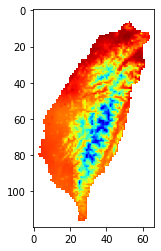

In [5]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

mask_id = np.where(data==-999.0)
data[mask_id] = np.nan
ma = np.ma.array(data,mask=np.isnan(data))
plt.imshow(np.flip(ma,0),cmap='jet')